In [21]:
%matplotlib inline
from altaipony.lcio import from_mast, from_path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/lightkurve/io/kepler.py:38: ResourceWarning: unclosed file <_io.FileIO name='/Users/chris/.lightkurve-cache/mastDownload/Kepler/kplr010646889_lc_Q111111111111111111/kplr010646889-2012277125453_llc.fits' mode='rb' closefd=True>
  time_format="bkjd",
2% (88/4432) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (88/4432) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

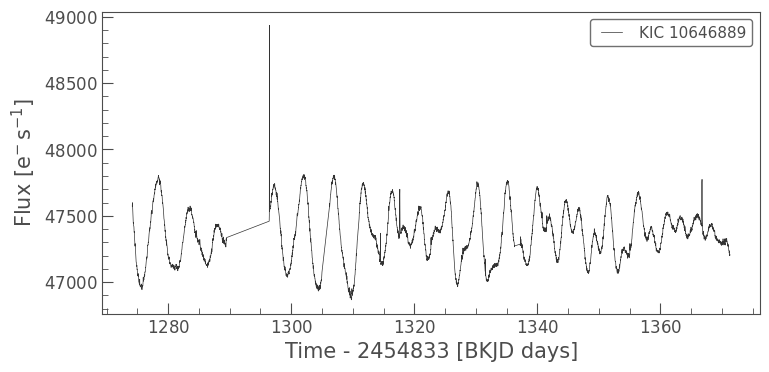

In [3]:
flc = from_mast("10646889", mode="LC", c=14, mission="Kepler")
flc.plot()

In [4]:
flcd = flc.detrend("savgol", window_length=59)

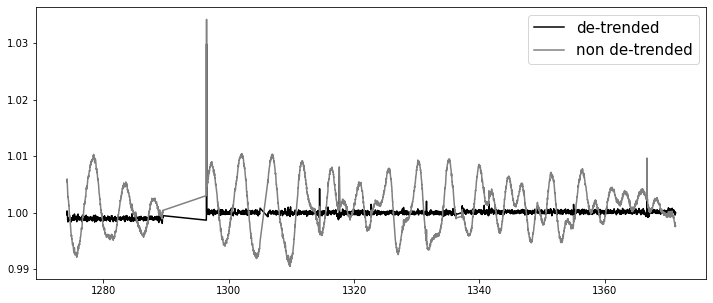

In [12]:
plt.figure(figsize=(12,5))

plt.plot(flcd.time.value, 
         flcd.detrended_flux / np.nanmedian(flcd.detrended_flux), 
         c="k", label="de-trended")
plt.plot(flcd.time.value, 
         flcd.flux / np.nanmedian(flcd.flux) + 0.001, 
         c="grey", label="non de-trended")
#plt.xlim(1365,1369)
plt.legend(fontsize=15);


In [ ]:
flcd = flcd.find_flares()
flcd.flares.sort_values(by="ed_rec", ascending=False)

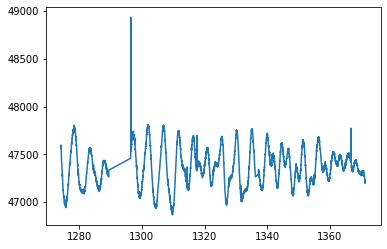

In [11]:
plt.plot(flc.time.value, flc.flux.value)

### The real thing

In [2]:
flc = from_mast("EPIC 246301900", mode="LC", c=12, mission="K2")
flc.plot()

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/lightkurve/io/kepler.py:38: ResourceWarning: unclosed file <_io.FileIO name='/Users/chris/.lightkurve-cache/mastDownload/K2/ktwo246301900-c12_lc/ktwo246301900-c12_llc.fits' mode='rb' closefd=True>
  time_format="bkjd",
7% (242/3599) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
7% (242/3599) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [3]:
# hacks to enable k2sc detrend
print(flc.origin)
flc.origin = 'TPF'
print(flc.origin)
flc['data_header'] = ''
flc['primary_header'] = ''

FLC
TPF


In [4]:
flcd = flc.detrend("k2sc") 
#flcd = flc.detrend("savgol", window_length=159)

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/k2sc/dtdata.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bstarts = np.full(nblocks, -bspan, np.int)   ## Starting indices for blocks
/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/k2sc/dtdata.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated 

Starting initial outlier detection at 3sigma.
  Flagged 117 ( 3.6%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    4.46 (fap 0.0000e+00 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE


/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/k2sc/de.py:85: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.zeros(3, np.int)


  DE iteration %3i -ln(L) %4.1f 0 -4246.165285132382
  DE iteration %3i -ln(L) %4.1f 1 -4246.165285132382
  DE iteration %3i -ln(L) %4.1f 2 -4246.165285132382
  DE iteration %3i -ln(L) %4.1f 3 -4249.704997557277
  DE iteration %3i -ln(L) %4.1f 4 -4249.704997557277
  DE iteration %3i -ln(L) %4.1f 5 -4296.792735342237
  DE iteration %3i -ln(L) %4.1f 6 -4296.792735342237
  DE iteration %3i -ln(L) %4.1f 7 -4296.792735342237
  DE iteration %3i -ln(L) %4.1f 8 -4296.792735342237
  DE iteration %3i -ln(L) %4.1f 9 -4300.92124906821
  DE iteration %3i -ln(L) %4.1f 10 -4300.92124906821
  DE iteration %3i -ln(L) %4.1f 11 -4300.92124906821
  DE iteration %3i -ln(L) %4.1f 12 -4300.92124906821
  DE iteration %3i -ln(L) %4.1f 13 -4300.92124906821
  DE iteration %3i -ln(L) %4.1f 14 -4301.886967344515
  DE iteration %3i -ln(L) %4.1f 15 -4301.886967344515
  DE iteration %3i -ln(L) %4.1f 16 -4301.886967344515
  DE iteration %3i -ln(L) %4.1f 17 -4301.886967344515
  DE iteration %3i -ln(L) %4.1f 18 -4301.88

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/k2sc/gp.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = zeros((t1.size,t2.size), np.bool)


  Local minimum found at: %s [-4.     0.501  4.643  0.018 -5.816 18.251 16.432 -3.077]


/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/k2sc/gp.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = zeros((t1.size,t2.size), np.bool)


Starting final outlier detection
  %5i too high 315
  %5i too low 66
  %5i not finite 0
Computing time and position trends


De-trending successfully completed.


  CDPP - raw - %6.3f 626.3172250095157
  CDPP - position component removed - %6.3f 565.3813202950121
  CDPP - full reduction - %6.3f 349.80986205680836
Detrending time 219.37543606758118


In [5]:
plt.figure(figsize=(12,5))

plt.plot(flcd.time.value, 
         flcd.detrended_flux / np.nanmedian(flcd.detrended_flux) - 1, 
         c="k", label="de-trended")
plt.plot(flcd.time.value, 
         flcd.flux / np.nanmedian(flcd.flux) - 1, # + 0.001
         c="grey", label="non de-trended")
plt.xlim(2906,2910)
plt.ylim(-0.1, 0.1)
plt.legend(fontsize=15);

In [6]:
flcdf = flcd.find_flares(N1=3.5, N2=4, N3=3)

Found 57 candidate(s) in the (0,1512) gap.
Found 1 candidate(s) in the (1512,1537) gap.
Found 19 candidate(s) in the (1537,2178) gap.
Found 3 candidate(s) in the (2178,2248) gap.
Found 7 candidate(s) in the (2248,2424) gap.
Found 6 candidate(s) in the (2424,2629) gap.
Found 9 candidate(s) in the (2629,2833) gap.
Found 2 candidate(s) in the (2833,2908) gap.
Found 3 candidate(s) in the (2908,3004) gap.
Found 3 candidate(s) in the (3014,3128) gap.
Found 3 candidate(s) in the (3132,3181) gap.
Found 0 candidate(s) in the (3186,3203) gap.
Found 1 candidate(s) in the (3203,3224) gap.
Found 0 candidate(s) in the (3229,3248) gap.


Hmm, running Davenport pipeline on Altaipony doesn't make sense because I've already run a version of Davenport on the lightcurve, and so I lose many actual flares because of the N3 issue (see below). Instead, why don't I just keep the top n flares, using either a set ampl_rec threshold, or a top n percentile.

In [7]:
flares = flcdf.flares
print(flares)

    istart istop  cstart   cstop       tstart        tstop      ed_rec  \
0        4    12  136860  136869  2905.479392  2905.663282    3.724188   
1       18    22  136875  136880  2905.785876  2905.888037    4.899109   
2       29    33  136887  136892  2906.031063  2906.133225    4.005552   
3       39    55  136898  136916  2906.255818  2906.623599   10.920935   
4       78    85  136941  136949  2907.134405  2907.297863  102.547859   
..     ...   ...     ...     ...          ...          ...         ...   
109   3095  3099  140495  140499  2979.748667  2979.830394    2.793619   
110   3134  3139  140553  140558  2980.933706  2981.035864    3.640179   
111   3145  3150  140565  140570  2981.178887  2981.281045    4.686301   
112   3166  3171  140588  140593  2981.648816  2981.750975   26.917590   
113   3219  3223  140664  140668  2983.201628  2983.283355   12.768643   

     ed_rec_err  ampl_rec       dur  total_n_valid_data_points  
0      0.090283  0.001190  0.183891           

In [8]:
buffer = 10
ind = 6
plt.scatter(flcd.time.value[flares.istart[ind]-buffer: flares.istop[ind]+buffer], 
           flcd.detrended_flux.value[flares.istart[ind]-buffer: flares.istop[ind]+buffer]) # flcd.flux.value
plt.show()

In [9]:
# this plot is important
# it tells me what to set the amplitude threshold at
# never mind. I ended up using Davenport's FINDFlare() instead of a hard threshold
# FINDFlare() gives me more flares
hist, bins = np.histogram(flares.loc[flares.ampl_rec < 0.005].ampl_rec, bins=20)
plt.scatter(bins[1:], hist)
plt.show()
print(hist)

[ 8 14 18  9  5  8 10  4  5  4  6  3  3  1  0  2  0  1  0  3]


In [10]:
percentile_val = flares['ampl_rec'].quantile(0.68) # one std assuming normal distribution, which I know this isn't¶
print(percentile_val)
print(flares.loc[flares['ampl_rec'] <= percentile_val])
# I feel like 68% still keeps too many flares...I'm going with a hard threshold for now

0.0021135906471074686
    istart istop  cstart   cstop       tstart        tstop     ed_rec  \
0        4    12  136860  136869  2905.479392  2905.663282   3.724188   
1       18    22  136875  136880  2905.785876  2905.888037   4.899109   
2       29    33  136887  136892  2906.031063  2906.133225   4.005552   
3       39    55  136898  136916  2906.255818  2906.623599  10.920935   
5      106   112  136971  136978  2907.747372  2907.890398   9.083080   
..     ...   ...     ...     ...          ...          ...        ...   
106   2998  3003  140373  140378  2977.256002  2977.358161   6.883420   
108   3065  3073  140462  140471  2979.074421  2979.258306  11.598067   
109   3095  3099  140495  140499  2979.748667  2979.830394   2.793619   
110   3134  3139  140553  140558  2980.933706  2981.035864   3.640179   
111   3145  3150  140565  140570  2981.178887  2981.281045   4.686301   

     ed_rec_err  ampl_rec       dur  total_n_valid_data_points  
0      0.090283  0.001190  0.183891 

In [11]:
flares_top = flares.loc[flares.ampl_rec > 0.0025].reset_index() # chose threshold based on histogram below
print(flares_top)

    index istart istop  cstart   cstop       tstart        tstop      ed_rec  \
0       4     78    85  136941  136949  2907.134405  2907.297863  102.547859   
1       9    183   197  137055  137071  2909.463677  2909.790592   44.357759   
2      12    258   278  137136  137157  2911.118682  2911.547757   19.494158   
3      14    317   331  137197  137212  2912.365041  2912.671523   30.031616   
4      15    364   367  137246  137250  2913.366214  2913.447942   23.885767   
5      16    377   385  137261  137269  2913.672695  2913.836151   26.806549   
6      17    419   426  137303  137312  2914.530842  2914.714730   27.753260   
7      23    526   533  137417  137424  2916.860092  2917.003116   12.204762   
8      29    629   637  137522  137531  2919.005449  2919.189337   19.286316   
9      33    704   722  137601  137619  2920.619572  2920.987346   37.979808   
10     39    873   883  137781  137792  2924.297309  2924.522059   20.291639   
11     46   1154  1162  138081  138090  

In [12]:
npeaks = len(flares_top)
print(npeaks)
fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
norm_flux = flcd.detrended_flux.value/np.nanmedian(flcd.detrended_flux.value)-1
buffer = 3
for i in range(npeaks):
    ax = axes[i]
    
    # plot everything, then limit
    ax.scatter(flcd.time.value, norm_flux, s=10)
    ax.scatter(flcd.time.value[flares_top.istart[i]:flares_top.istop[i]], 
                               norm_flux[flares_top.istart[i]:flares_top.istop[i]], color='red', s=10)
    #ax.axvline(flc.flux.value[flc.time.value[flares.istart[i]]][np.argmax(flux_diff[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[flares_top.istart[i]]-0.2, flcd.time.value[flares_top.istop[i]]+0.2)
    #ax.set_ylim(np.min(norm_flux[buffer])-0.005, np.max(norm_flux[buffer])+0.005)
    ax.set_ylim(np.min(norm_flux[flares_top.istart[i]:flares_top.istop[i]])-0.01, 
               np.min(norm_flux[flares_top.istart[i]:flares_top.istop[i]])+0.01)
    
plt.show()

27


In [13]:
plt.scatter(flcd.time.value, norm_flux, s=10)
for i in range(npeaks):
    plt.scatter(flcd.time.value[flares_top.istart[i]:flares_top.istop[i]], 
                               norm_flux[flares_top.istart[i]:flares_top.istop[i]], color='red', s=10)
time_range = flcd.time.value.max() - flcd.time.value.min()
#plt.xlim(flcd.time.value.min()+2*time_range/3, flcd.time.value.min()+3*time_range/3)
plt.xlim(2938, 2953.4)
plt.ylim(-0.01, 0.015)
plt.show()

#### Match this against the manually downloaded data used in davenport_procedure and xoflares implementation

Didn't turn out to be a good idea

In [14]:
from astropy.io import fits
filename = '/Users/chris/Desktop/superflares/ktwo246301900-c12_llc.fits'
hdul = fits.open(filename)
hdul.info()

Filename: /Users/chris/Desktop/superflares/ktwo246301900-c12_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   3862R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (10, 8)   int32   


In [15]:
data = fits.getdata(filename,header=True,ext=1)
lc = pd.DataFrame(np.array(data[0]).byteswap().newbyteorder()) 
lc = lc.dropna(subset=['TIME','PDCSAP_FLUX','PDCSAP_FLUX_ERR']) # toss NaNs since they'll create matrices of NaNs

In [16]:
print(len(lc), len(flcd))

3255 3248


In [17]:
index = 4
region = lc.loc[(lc.TIME > flares.tstart[index]) & (lc.TIME < flares.tstop[index])]
plt.scatter(region.TIME, region.PDCSAP_FLUX)
#plt.scatter(lc.TIME[flares.tstart[0]:flares.tstop[0]],
#           lc.PDCSAP_FLUX[flares.tstart[0]:flares.tstop[0]])
plt.show()

#### Altaipony for detrending + Davenport FINDflare() for flare identification

In [18]:
flux_diff = flcd.detrended_flux / np.nanmedian(flcd.detrended_flux) - 1
error = flcd.detrended_flux_err / np.nanmedian(flcd.detrended_flux_err) - 1
print(flux_diff, error)

     detrended_flux    
-----------------------
-0.00020698924516993067
 -0.0002112649046288606
 -0.0003093447482122036
 -7.842221559462015e-05
  0.0011298499045759858
  0.0005361643619421486
 0.00012754384452717815
 -0.0004712306974389291
  0.0001334066323341876
 0.00020804801133067485
  0.0002031644133539956
 0.00017494173303478355
 -6.652935231832302e-06
  8.434248240707376e-05
  0.0001104277760666239
-0.00020093985056168773
-0.00024380752632224834
-0.00011211937092714397
 0.00036968338572207493
                    ...
  0.0006013318820801139
 0.00011645899255952052
 -0.0002112504593940745
 1.8403909385344974e-06
  0.0002639017009262723
-0.00022071869053319482
-0.00019895591423846337
  0.0014746926657265291
  0.0001608122416854041
  3.527417930904164e-05
 2.2923904714478027e-05
 -0.0007834811041175227
 -0.0006815648196971669
 -0.0007895019140813364
 -0.0008707676594548186
 -0.0009226259331786002
 -0.0009913505903703657
    0.00231208095358304
   0.001197753469738272
 0.0004521536139

In [19]:
print(len(lc.TIME), len(flcd.time.value))

3255 3248


findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


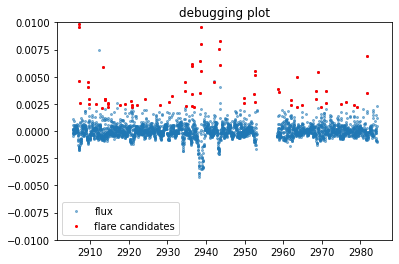

In [22]:
gapwindow = 0.1
minsep = 3
import appaloosa_snippets.appaloosa as appaloosa

# run final flare-find on DATA - MODEL
isflare = appaloosa.FINDflare(flux_diff, error, N1=7, N2=4, N3=1, # setting N3=1 is risky for FPs, but there's at least one flare we're missing without it
                    returnbinary=True, avg_std=True, std_window=7)

# now pick out final flare candidate points from above
cand1 = np.where(isflare > 0)[0]

time = flcd.time.value #lc.TIME
#time = np.array(time)
x1 = np.where((np.abs(time[cand1]-time[-1]) < gapwindow))
x2 = np.where((np.abs(time[cand1]-time[0]) < gapwindow))
cand1 = np.delete(cand1, x1)
cand1 = np.delete(cand1, x2)
if (len(cand1) < 1):
    istart_i = np.array([])
    istop_i = np.array([])
else:
    # find start and stop index, combine neighboring candidates in to same events
    istart_i = cand1[np.append([0], np.where((cand1[1:]-cand1[:-1] > minsep))[0]+1)]
    istop_i = cand1[np.append(np.where((cand1[1:]-cand1[:-1] > minsep))[0], [len(cand1)-1])]
# if start & stop times are the same, add 1 more datum on the end
to1 = np.where((istart_i-istop_i == 0))
if len(to1[0])>0:
    istop_i[to1] += 1

#print(flux_model_i)
plt.figure()
plt.title('debugging plot')
#plt.scatter(time, norm_flux, alpha=0.5,label='flux', s=15)
plt.scatter(flcd.time.value, flux_diff, alpha=0.5,label='flux', s=4)
#plt.plot(time,flux_model_i+np.nanmedian(lc.PDCSAP_FLUX), c='black',label='flux model')
#plt.scatter(time[cand1], np.array(norm_flux)[cand1], c='red',label='flare candidates', s=15)
plt.scatter(flcd.time.value[cand1], np.array(flux_diff)[cand1], c='red',label='flare candidates', s=4)
#plt.xlim(2935, 2938) # 2970, 2975
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

42 [array([78, 79, 80, 81, 82]), array([184, 185, 186, 187]), array([270]), array([350]), array([364]), array([378, 379, 380]), array([420, 421, 422]), array([568]), array([631]), array([705]), array([708, 709]), array([771]), array([873]), array([1047]), array([1155]), array([1183]), array([1335, 1336]), array([1352]), array([1417, 1418, 1419, 1420]), array([1446]), array([1510, 1511, 1512, 1513, 1514]), array([1519, 1520, 1521]), array([1665]), array([1733, 1734, 1735]), array([2023, 2024]), array([2147]), array([2160, 2161, 2162]), array([2195, 2196]), array([2327]), array([2336]), array([2406, 2407]), array([2453]), array([2617, 2618]), array([2629]), array([2666]), array([2724, 2725]), array([2772]), array([2899]), array([2954]), array([3026]), array([3069]), array([3167, 3168])]


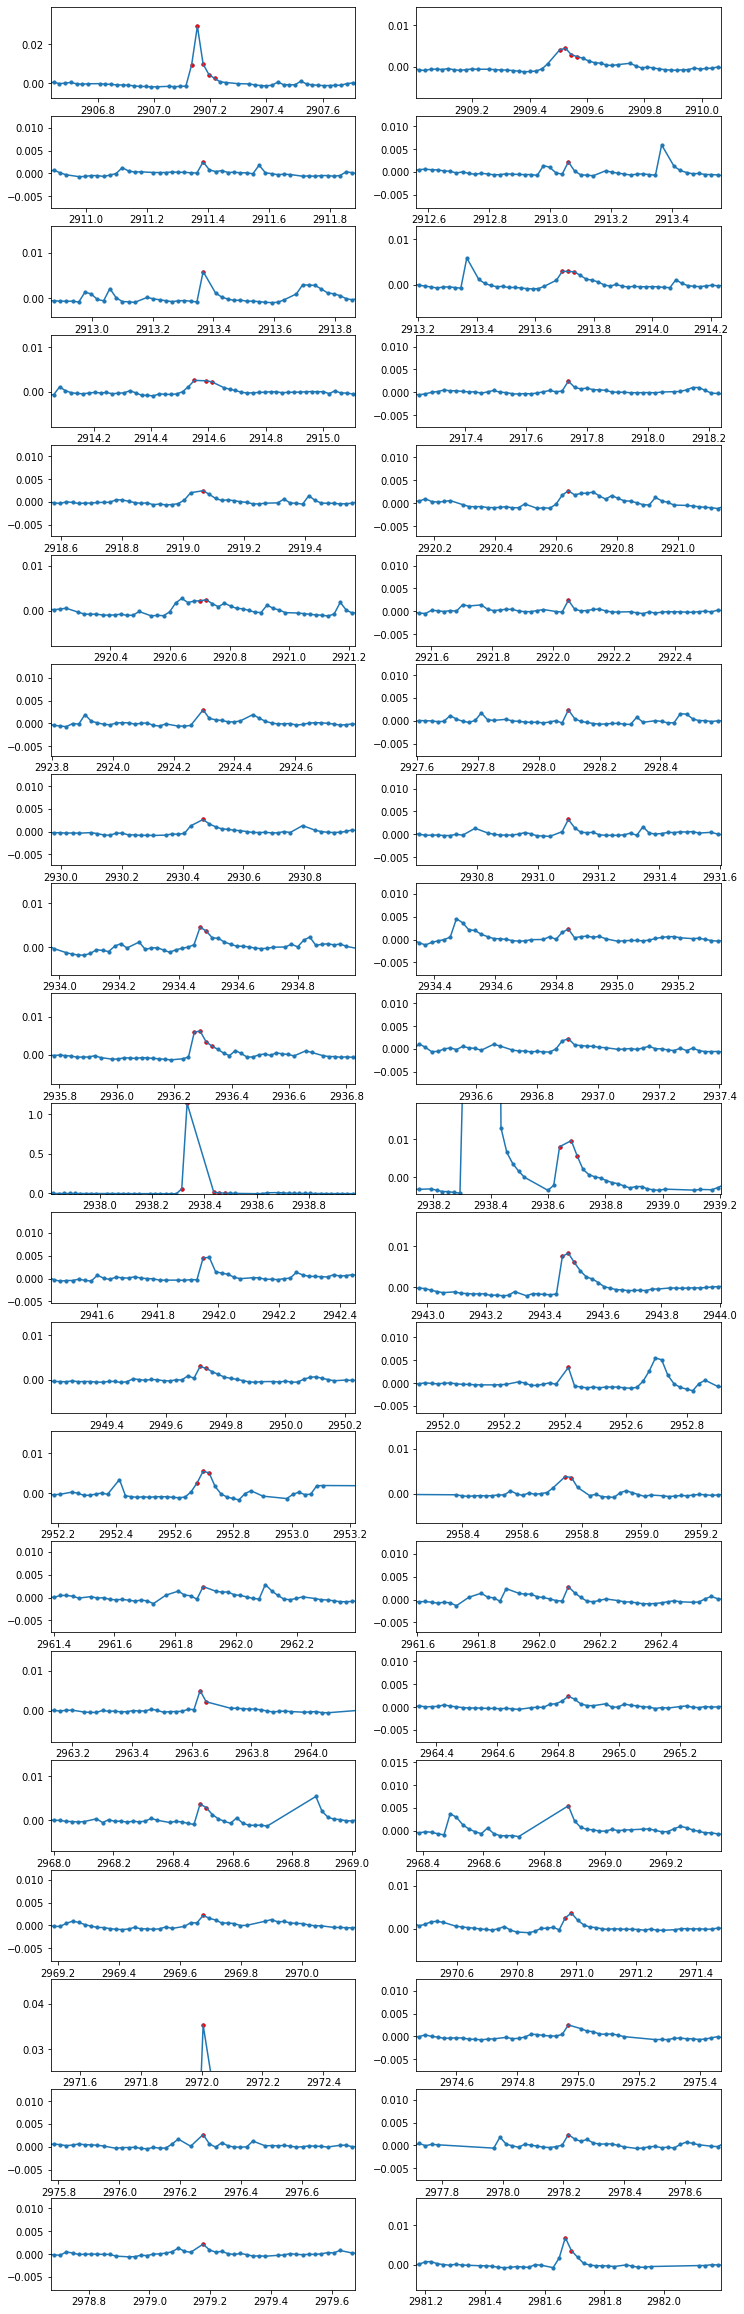

In [23]:
# from https://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-in-a-numpy-array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

flares = consecutive(cand1)
npeaks = len(flares)
buffer_size = 0
print(npeaks, flares)

fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
for i in range(npeaks): # range(npeaks)
    ax = axes[i]
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) # add n points to the left for plot
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) # add n points to the right for plot
    #print(buffer)
    #print(flcd.time.value[buffer][0]-0.5)
    ax.plot(flcd.time.value, flux_diff)
    ax.scatter(flcd.time.value, flux_diff, s=10)
    ax.scatter(flcd.time.value[buffer], 
                               norm_flux[buffer], color='red', s=10)
    #ax.axvline(time[flares[i]][np.argmax(lc.PDCSAP_FLUX[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[buffer][0]-0.5, flcd.time.value[buffer][-1]+0.5)
    ax.set_ylim(np.min(norm_flux[buffer])-0.01, np.max(norm_flux[buffer])+0.01)
    ax.ticklabel_format(useOffset=False) # keeps all axes in non-scientific notation

plt.show()

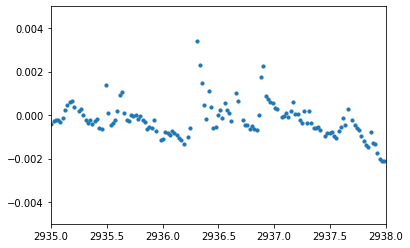

In [24]:
plt.scatter(flcd.time.value, flux_diff, s=10)
for i in range(npeaks):
    #plt.scatter(flcd.time.value[flares_top.istart[i]:flares_top.istop[i]], 
    #                           flux_diff[flares_top.istart[i]:flares_top.istop[i]], color='red', s=10)
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) 
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) 
    ax.scatter(flcd.time.value[buffer], flux_diff[buffer], color='red', s=10)
    
plt.xlim(2935, 2938)
plt.ylim(-0.005, 0.005)
plt.show()


#### Altaipony + FINDflare() + 7/4/2

And then again but with cand2, an extra test to independently keep points that are above a certain sigma from 0

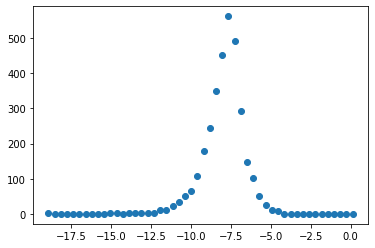

In [25]:
# distribution of amplitudes of detrended flux light curve
hist, bins = np.histogram(np.log(np.abs(flux_diff)), bins=50)
plt.scatter(bins[1:], hist)
plt.show()

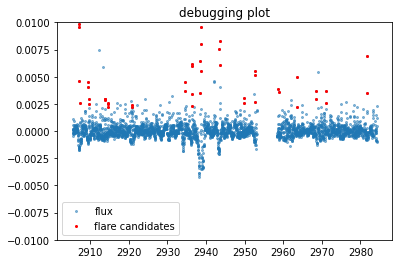

In [26]:
gapwindow = 0.1
minsep = 3
import appaloosa_snippets.appaloosa as appaloosa

# run final flare-find on DATA - MODEL
isflare = appaloosa.FINDflare(flux_diff, error, N1=7, N2=4, N3=2, # setting N3=1 is risky for FPs, but there's at least one flare we're missing without it
                    returnbinary=True, avg_std=True, std_window=7)

# now pick out final flare candidate points from above
cand1 = np.where(isflare > 0)[0]
cand2 = np.where(np.log(np.abs(flux_diff)) > np.log(7*np.nanstd(flux_diff))) # never mind, bad idea
#print(np.log(7*np.nanstd(flux_diff)))
#print(cand2)

time = flcd.time.value #lc.TIME
#time = np.array(time)
x1 = np.where((np.abs(time[cand1]-time[-1]) < gapwindow))
x2 = np.where((np.abs(time[cand1]-time[0]) < gapwindow))
cand1 = np.delete(cand1, x1)
cand1 = np.delete(cand1, x2)
if (len(cand1) < 1):
    istart_i = np.array([])
    istop_i = np.array([])
else:
    # find start and stop index, combine neighboring candidates in to same events
    istart_i = cand1[np.append([0], np.where((cand1[1:]-cand1[:-1] > minsep))[0]+1)]
    istop_i = cand1[np.append(np.where((cand1[1:]-cand1[:-1] > minsep))[0], [len(cand1)-1])]
# if start & stop times are the same, add 1 more datum on the end
to1 = np.where((istart_i-istop_i == 0))
if len(to1[0])>0:
    istop_i[to1] += 1

#print(flux_model_i)
plt.figure()
plt.title('debugging plot')
#plt.scatter(time, norm_flux, alpha=0.5,label='flux', s=15)
plt.scatter(flcd.time.value, flux_diff, alpha=0.5,label='flux', s=4)
#plt.plot(time,flux_model_i+np.nanmedian(lc.PDCSAP_FLUX), c='black',label='flux model')
#plt.scatter(time[cand1], np.array(norm_flux)[cand1], c='red',label='flare candidates', s=15)
plt.scatter(flcd.time.value[cand1], np.array(flux_diff)[cand1], c='red',label='flare candidates', s=4)
#plt.xlim(2935, 2938) # 2970, 2975
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

17 [array([78, 79, 80, 81, 82]), array([184, 185, 186, 187]), array([378, 379, 380]), array([420, 421, 422]), array([708, 709]), array([1335, 1336]), array([1417, 1418, 1419, 1420]), array([1510, 1511, 1512, 1513, 1514]), array([1519, 1520, 1521]), array([1733, 1734, 1735]), array([2023, 2024]), array([2160, 2161, 2162]), array([2195, 2196]), array([2406, 2407]), array([2617, 2618]), array([2724, 2725]), array([3167, 3168])]


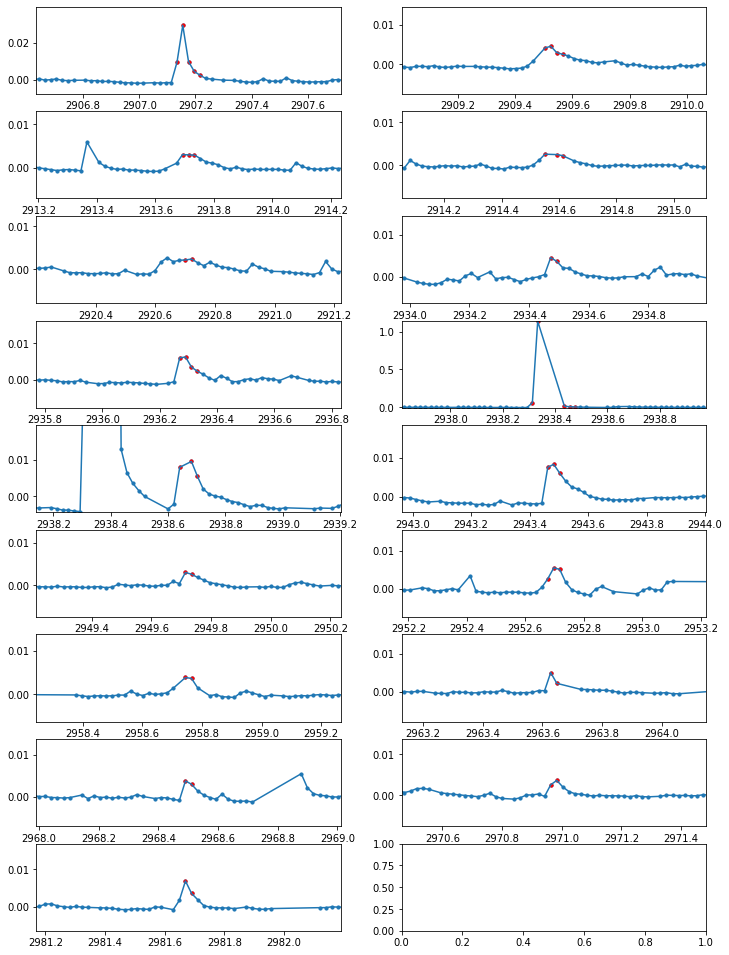

In [28]:
# from https://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-in-a-numpy-array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

flares = consecutive(cand1)
npeaks = len(flares)
buffer_size = 0
print(npeaks, flares)

fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
for i in range(npeaks): # range(npeaks)
    ax = axes[i]
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) # add n points to the left for plot
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) # add n points to the right for plot
    #print(buffer)
    #print(flcd.time.value[buffer][0]-0.5)
    ax.plot(flcd.time.value, flux_diff)
    ax.scatter(flcd.time.value, flux_diff, s=10)
    ax.scatter(flcd.time.value[buffer], 
                               flux_diff[buffer], color='red', s=10)
    #ax.axvline(time[flares[i]][np.argmax(lc.PDCSAP_FLUX[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[buffer][0]-0.5, flcd.time.value[buffer][-1]+0.5)
    ax.set_ylim(np.min(flux_diff[buffer])-0.01, np.max(flux_diff[buffer])+0.01)
    ax.ticklabel_format(useOffset=False) # keeps all axes in non-scientific notation

plt.show()

#### Altaipony + FINDflare() + 5/4/1

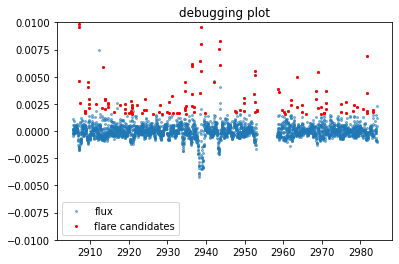

In [29]:
gapwindow = 0.1
minsep = 3
import appaloosa_snippets.appaloosa as appaloosa

# run final flare-find on DATA - MODEL
isflare = appaloosa.FINDflare(flux_diff, error, N1=5, N2=4, N3=1, # setting N3=1 is risky for FPs, but there's at least one flare we're missing without it
                    returnbinary=True, avg_std=True, std_window=7)

# now pick out final flare candidate points from above
cand1 = np.where(isflare > 0)[0]

time = flcd.time.value #lc.TIME
#time = np.array(time)
x1 = np.where((np.abs(time[cand1]-time[-1]) < gapwindow))
x2 = np.where((np.abs(time[cand1]-time[0]) < gapwindow))
cand1 = np.delete(cand1, x1)
cand1 = np.delete(cand1, x2)
if (len(cand1) < 1):
    istart_i = np.array([])
    istop_i = np.array([])
else:
    # find start and stop index, combine neighboring candidates in to same events
    istart_i = cand1[np.append([0], np.where((cand1[1:]-cand1[:-1] > minsep))[0]+1)]
    istop_i = cand1[np.append(np.where((cand1[1:]-cand1[:-1] > minsep))[0], [len(cand1)-1])]
# if start & stop times are the same, add 1 more datum on the end
to1 = np.where((istart_i-istop_i == 0))
if len(to1[0])>0:
    istop_i[to1] += 1

#print(flux_model_i)
plt.figure()
plt.title('debugging plot')
#plt.scatter(time, norm_flux, alpha=0.5,label='flux', s=15)
plt.scatter(flcd.time.value, flux_diff, alpha=0.5,label='flux', s=4)
#plt.plot(time,flux_model_i+np.nanmedian(lc.PDCSAP_FLUX), c='black',label='flux model')
#plt.scatter(time[cand1], np.array(norm_flux)[cand1], c='red',label='flare candidates', s=15)
plt.scatter(flcd.time.value[cand1], np.array(flux_diff)[cand1], c='red',label='flare candidates', s=4)
#plt.xlim(2935, 2938) # 2970, 2975
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

71 [array([78, 79, 80, 81, 82]), array([140, 141]), array([150]), array([184, 185, 186, 187, 188]), array([270]), array([350]), array([364]), array([378, 379, 380, 381]), array([420, 421, 422]), array([488]), array([568]), array([630, 631, 632]), array([681]), array([704, 705, 706, 707, 708, 709, 710]), array([712]), array([771]), array([831]), array([856]), array([873]), array([880]), array([968]), array([1034]), array([1047]), array([1064]), array([1127]), array([1155, 1156]), array([1183]), array([1195]), array([1251]), array([1263]), array([1335, 1336, 1337, 1338]), array([1351, 1352]), array([1417, 1418, 1419, 1420]), array([1445, 1446]), array([1510, 1511, 1512, 1513, 1514]), array([1519, 1520, 1521]), array([1563]), array([1665]), array([1733, 1734, 1735]), array([1917]), array([1937]), array([1982]), array([2023, 2024, 2025]), array([2147]), array([2160, 2161, 2162, 2163]), array([2176, 2177]), array([2195, 2196]), array([2230]), array([2249]), array([2269]), array([2294]), arr

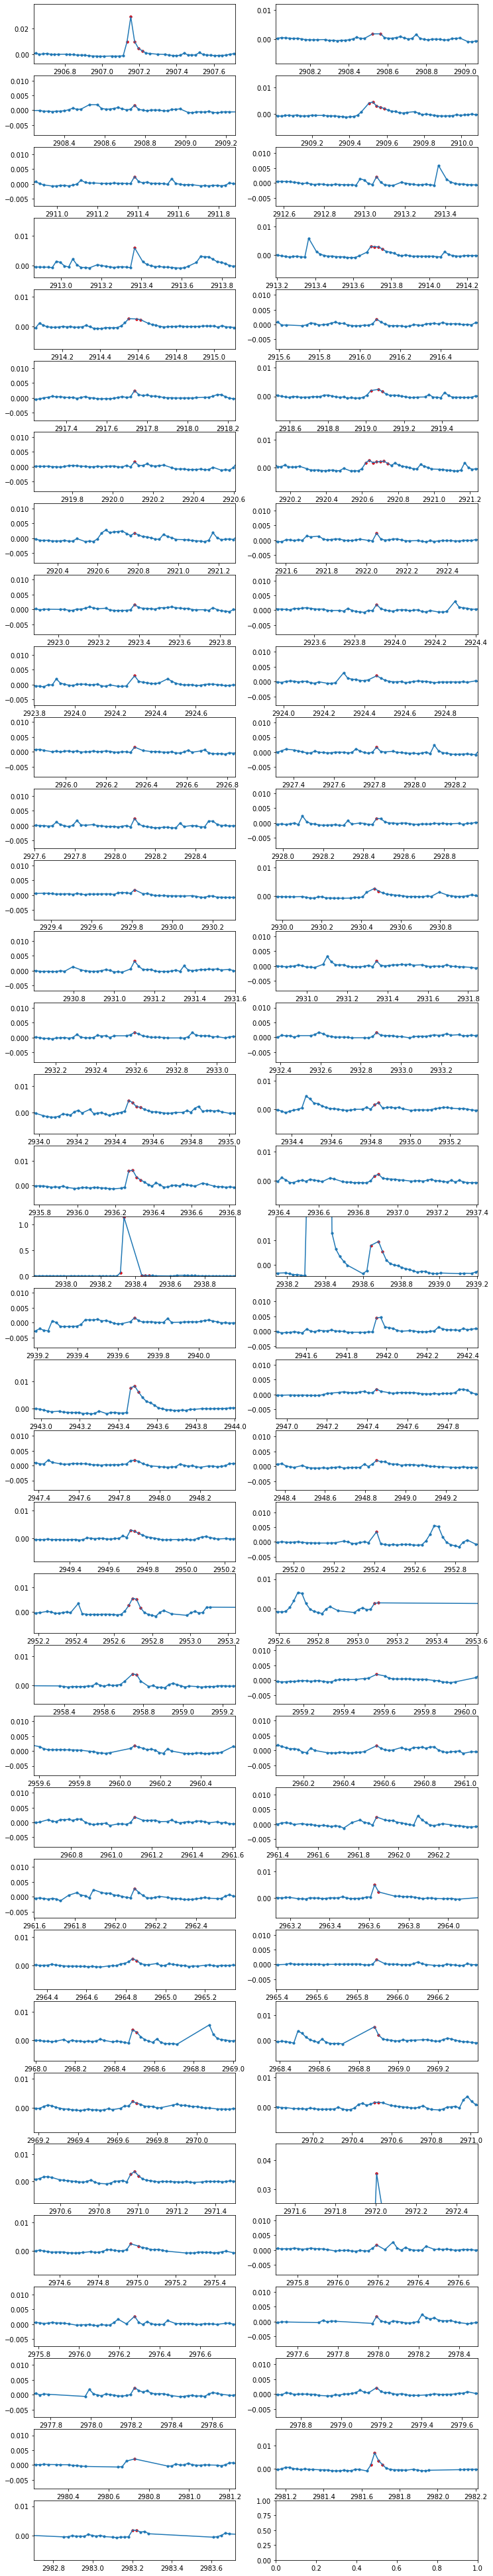

In [30]:
# from https://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-in-a-numpy-array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

flares = consecutive(cand1)
npeaks = len(flares)
buffer_size = 0
print(npeaks, flares)

fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
for i in range(npeaks): # range(npeaks)
    ax = axes[i]
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) # add n points to the left for plot
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) # add n points to the right for plot
    #print(buffer)
    #print(flcd.time.value[buffer][0]-0.5)
    ax.plot(flcd.time.value, flux_diff)
    ax.scatter(flcd.time.value, flux_diff, s=10)
    ax.scatter(flcd.time.value[buffer], 
                               flux_diff[buffer], color='red', s=10)
    #ax.axvline(time[flares[i]][np.argmax(lc.PDCSAP_FLUX[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[buffer][0]-0.5, flcd.time.value[buffer][-1]+0.5)
    ax.set_ylim(np.min(flux_diff[buffer])-0.01, np.max(flux_diff[buffer])+0.01)
    ax.ticklabel_format(useOffset=False) # keeps all axes in non-scientific notation

plt.show()

#### Altainpony + FINDflare() + 5/4/2

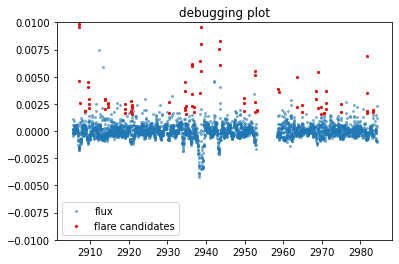

In [31]:
gapwindow = 0.1
minsep = 3
import appaloosa_snippets.appaloosa as appaloosa

# run final flare-find on DATA - MODEL
isflare = appaloosa.FINDflare(flux_diff, error, N1=5, N2=4, N3=2, # setting N3=1 is risky for FPs, but there's at least one flare we're missing without it
                    returnbinary=True, avg_std=True, std_window=7)

# now pick out final flare candidate points from above
cand1 = np.where(isflare > 0)[0]

time = flcd.time.value #lc.TIME
#time = np.array(time)
x1 = np.where((np.abs(time[cand1]-time[-1]) < gapwindow))
x2 = np.where((np.abs(time[cand1]-time[0]) < gapwindow))
cand1 = np.delete(cand1, x1)
cand1 = np.delete(cand1, x2)
if (len(cand1) < 1):
    istart_i = np.array([])
    istop_i = np.array([])
else:
    # find start and stop index, combine neighboring candidates in to same events
    istart_i = cand1[np.append([0], np.where((cand1[1:]-cand1[:-1] > minsep))[0]+1)]
    istop_i = cand1[np.append(np.where((cand1[1:]-cand1[:-1] > minsep))[0], [len(cand1)-1])]
# if start & stop times are the same, add 1 more datum on the end
to1 = np.where((istart_i-istop_i == 0))
if len(to1[0])>0:
    istop_i[to1] += 1

#print(flux_model_i)
plt.figure()
plt.title('debugging plot')
#plt.scatter(time, norm_flux, alpha=0.5,label='flux', s=15)
plt.scatter(flcd.time.value, flux_diff, alpha=0.5,label='flux', s=4)
#plt.plot(time,flux_model_i+np.nanmedian(lc.PDCSAP_FLUX), c='black',label='flux model')
#plt.scatter(time[cand1], np.array(norm_flux)[cand1], c='red',label='flare candidates', s=15)
plt.scatter(flcd.time.value[cand1], np.array(flux_diff)[cand1], c='red',label='flare candidates', s=4)
#plt.xlim(2935, 2938) # 2970, 2975
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

29 [array([78, 79, 80, 81, 82]), array([140, 141]), array([184, 185, 186, 187, 188]), array([378, 379, 380, 381]), array([420, 421, 422]), array([630, 631, 632]), array([704, 705, 706, 707, 708, 709, 710]), array([1155, 1156]), array([1335, 1336, 1337, 1338]), array([1351, 1352]), array([1417, 1418, 1419, 1420]), array([1445, 1446]), array([1510, 1511, 1512, 1513, 1514]), array([1519, 1520, 1521]), array([1733, 1734, 1735]), array([2023, 2024, 2025]), array([2160, 2161, 2162, 2163]), array([2176, 2177]), array([2195, 2196]), array([2406, 2407]), array([2453, 2454]), array([2617, 2618]), array([2629, 2630]), array([2666, 2667]), array([2704, 2705]), array([2724, 2725, 2726]), array([2899, 2900]), array([3166, 3167, 3168, 3169]), array([3219, 3220])]


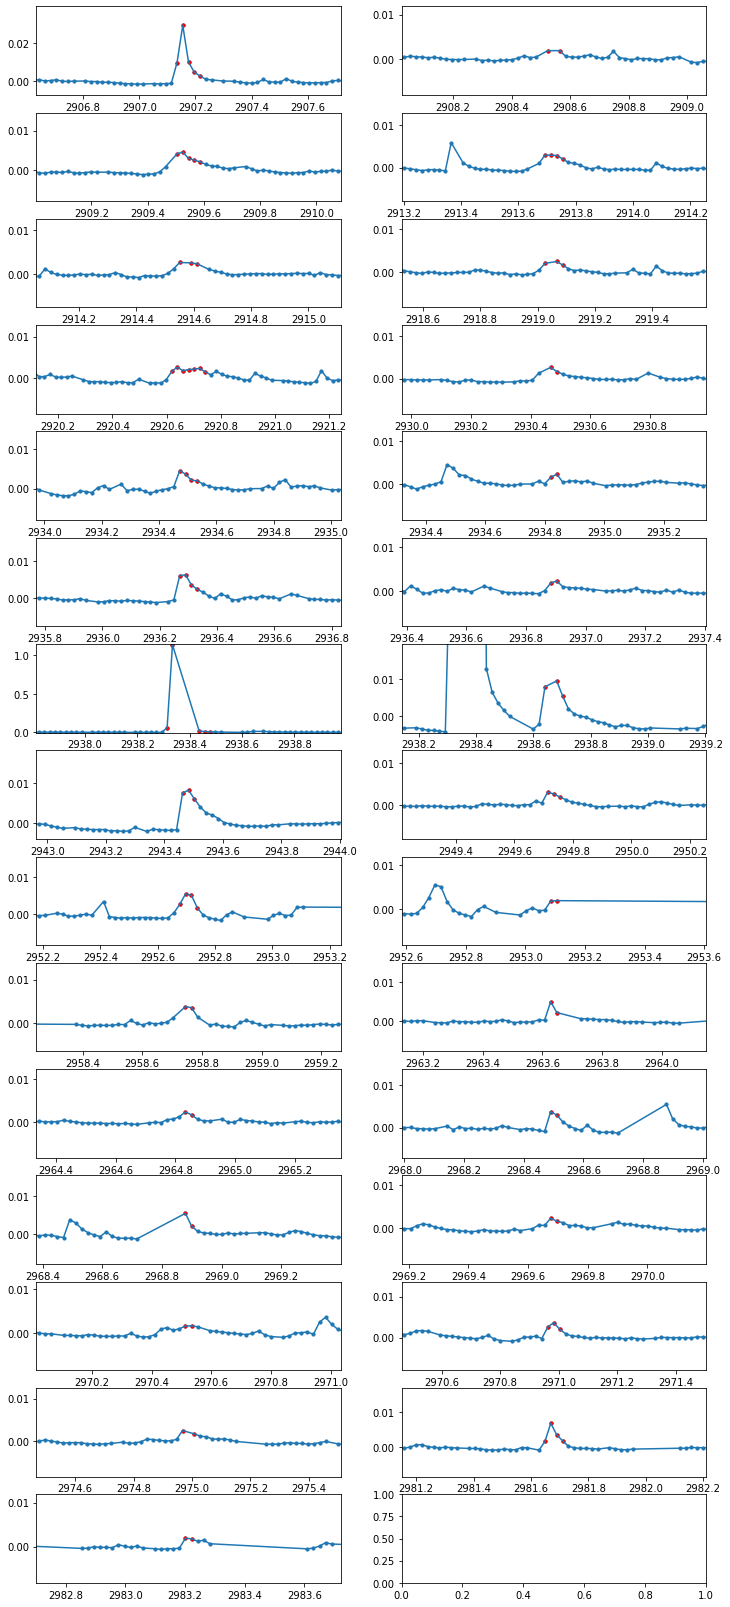

In [32]:
# from https://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-in-a-numpy-array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

flares = consecutive(cand1)
npeaks = len(flares)
buffer_size = 0
print(npeaks, flares)

fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
for i in range(npeaks): # range(npeaks)
    ax = axes[i]
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) # add n points to the left for plot
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) # add n points to the right for plot
    #print(buffer)
    #print(flcd.time.value[buffer][0]-0.5)
    ax.plot(flcd.time.value, flux_diff)
    ax.scatter(flcd.time.value, flux_diff, s=10)
    ax.scatter(flcd.time.value[buffer], 
                               flux_diff[buffer], color='red', s=10)
    #ax.axvline(time[flares[i]][np.argmax(lc.PDCSAP_FLUX[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[buffer][0]-0.5, flcd.time.value[buffer][-1]+0.5)
    ax.set_ylim(np.min(flux_diff[buffer])-0.01, np.max(flux_diff[buffer])+0.01)
    ax.ticklabel_format(useOffset=False) # keeps all axes in non-scientific notation

plt.show()

#### Altainpony + FINDflare() + 6/4/1

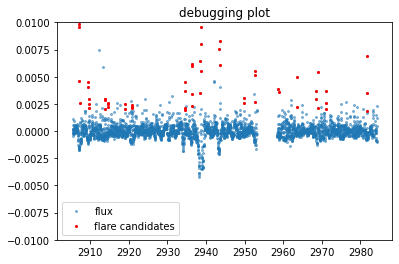

In [35]:
gapwindow = 0.1
minsep = 3
import appaloosa_snippets.appaloosa as appaloosa

# run final flare-find on DATA - MODEL
isflare = appaloosa.FINDflare(flux_diff, error, N1=6, N2=4, N3=2, # setting N3=1 is risky for FPs, but there's at least one flare we're missing without it
                    returnbinary=True, avg_std=True, std_window=7)

# now pick out final flare candidate points from above
cand1 = np.where(isflare > 0)[0]

time = flcd.time.value #lc.TIME
#time = np.array(time)
x1 = np.where((np.abs(time[cand1]-time[-1]) < gapwindow))
x2 = np.where((np.abs(time[cand1]-time[0]) < gapwindow))
cand1 = np.delete(cand1, x1)
cand1 = np.delete(cand1, x2)
if (len(cand1) < 1):
    istart_i = np.array([])
    istop_i = np.array([])
else:
    # find start and stop index, combine neighboring candidates in to same events
    istart_i = cand1[np.append([0], np.where((cand1[1:]-cand1[:-1] > minsep))[0]+1)]
    istop_i = cand1[np.append(np.where((cand1[1:]-cand1[:-1] > minsep))[0], [len(cand1)-1])]
# if start & stop times are the same, add 1 more datum on the end
to1 = np.where((istart_i-istop_i == 0))
if len(to1[0])>0:
    istop_i[to1] += 1

#print(flux_model_i)
plt.figure()
plt.title('debugging plot')
#plt.scatter(time, norm_flux, alpha=0.5,label='flux', s=15)
plt.scatter(flcd.time.value, flux_diff, alpha=0.5,label='flux', s=4)
#plt.plot(time,flux_model_i+np.nanmedian(lc.PDCSAP_FLUX), c='black',label='flux model')
#plt.scatter(time[cand1], np.array(norm_flux)[cand1], c='red',label='flare candidates', s=15)
plt.scatter(flcd.time.value[cand1], np.array(flux_diff)[cand1], c='red',label='flare candidates', s=4)
#plt.xlim(2935, 2938) # 2970, 2975
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

19 [array([78, 79, 80, 81, 82]), array([184, 185, 186, 187, 188]), array([378, 379, 380, 381]), array([420, 421, 422]), array([630, 631]), array([707, 708, 709]), array([1335, 1336, 1337, 1338]), array([1417, 1418, 1419, 1420]), array([1510, 1511, 1512, 1513, 1514]), array([1519, 1520, 1521]), array([1733, 1734, 1735]), array([2023, 2024]), array([2160, 2161, 2162]), array([2195, 2196]), array([2406, 2407]), array([2617, 2618]), array([2629, 2630]), array([2724, 2725, 2726]), array([3167, 3168, 3169])]


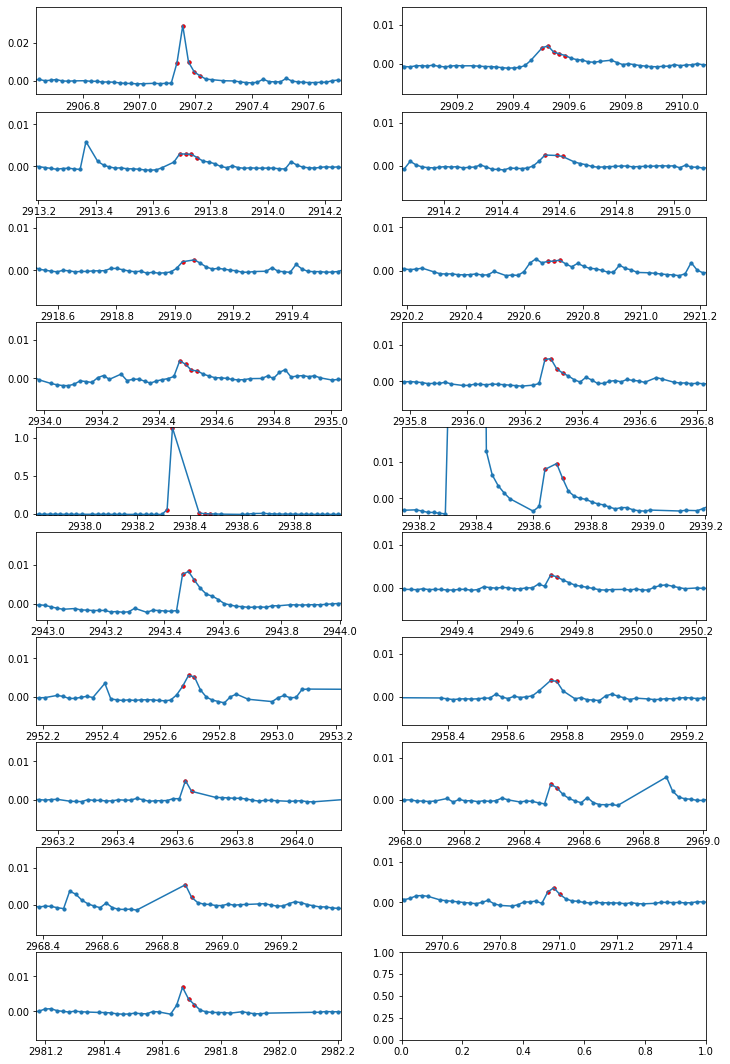

In [36]:
# from https://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-in-a-numpy-array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

flares = consecutive(cand1)
npeaks = len(flares)
buffer_size = 0
print(npeaks, flares)

fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
for i in range(npeaks): # range(npeaks)
    ax = axes[i]
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) # add n points to the left for plot
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) # add n points to the right for plot
    #print(buffer)
    #print(flcd.time.value[buffer][0]-0.5)
    ax.plot(flcd.time.value, flux_diff)
    ax.scatter(flcd.time.value, flux_diff, s=10)
    ax.scatter(flcd.time.value[buffer], 
                               flux_diff[buffer], color='red', s=10)
    #ax.axvline(time[flares[i]][np.argmax(lc.PDCSAP_FLUX[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[buffer][0]-0.5, flcd.time.value[buffer][-1]+0.5)
    ax.set_ylim(np.min(flux_diff[buffer])-0.01, np.max(flux_diff[buffer])+0.01)
    ax.ticklabel_format(useOffset=False) # keeps all axes in non-scientific notation

plt.show()

6/4/1 is missing several obvious flares right off the bat, and so is 6/4/2...looks like 7/4/1 is our winner for the 1-point threshold mode, while 5/4/2 is our winner for the 2-point threshold. Or 5/4/1 if we are more relaxed about FPs...what if we YOLO'd?

#### Altaipony + FINDflare() + 3.5/4/1

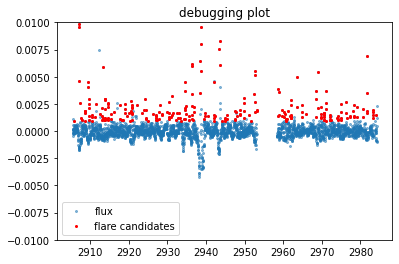

In [39]:
gapwindow = 0.1
minsep = 3
import appaloosa_snippets.appaloosa as appaloosa

# run final flare-find on DATA - MODEL
isflare = appaloosa.FINDflare(flux_diff, error, N1=3, N2=4, N3=1, # setting N3=1 is risky for FPs, but there's at least one flare we're missing without it
                    returnbinary=True, avg_std=True, std_window=7)

# now pick out final flare candidate points from above
cand1 = np.where(isflare > 0)[0]

time = flcd.time.value #lc.TIME
#time = np.array(time)
x1 = np.where((np.abs(time[cand1]-time[-1]) < gapwindow))
x2 = np.where((np.abs(time[cand1]-time[0]) < gapwindow))
cand1 = np.delete(cand1, x1)
cand1 = np.delete(cand1, x2)
if (len(cand1) < 1):
    istart_i = np.array([])
    istop_i = np.array([])
else:
    # find start and stop index, combine neighboring candidates in to same events
    istart_i = cand1[np.append([0], np.where((cand1[1:]-cand1[:-1] > minsep))[0]+1)]
    istop_i = cand1[np.append(np.where((cand1[1:]-cand1[:-1] > minsep))[0], [len(cand1)-1])]
# if start & stop times are the same, add 1 more datum on the end
to1 = np.where((istart_i-istop_i == 0))
if len(to1[0])>0:
    istop_i[to1] += 1

#print(flux_model_i)
plt.figure()
plt.title('debugging plot')
#plt.scatter(time, norm_flux, alpha=0.5,label='flux', s=15)
plt.scatter(flcd.time.value, flux_diff, alpha=0.5,label='flux', s=4)
#plt.plot(time,flux_model_i+np.nanmedian(lc.PDCSAP_FLUX), c='black',label='flux model')
#plt.scatter(time[cand1], np.array(norm_flux)[cand1], c='red',label='flare candidates', s=15)
plt.scatter(flcd.time.value[cand1], np.array(flux_diff)[cand1], c='red',label='flare candidates', s=4)
#plt.xlim(2935, 2938) # 2970, 2975
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

126 [array([19]), array([78, 79, 80, 81, 82]), array([95]), array([109]), array([140, 141]), array([146]), array([150]), array([184, 185, 186, 187, 188, 189, 190]), array([229, 230, 231]), array([258]), array([270]), array([318]), array([346, 347]), array([350]), array([364, 365]), array([377, 378, 379, 380, 381, 382, 383]), array([397]), array([419, 420, 421, 422, 423]), array([451, 452]), array([488]), array([568, 569]), array([587, 588]), array([604]), array([630, 631, 632]), array([647]), array([681]), array([684]), array([704, 705, 706, 707, 708, 709, 710]), array([712, 713]), array([771]), array([831]), array([856]), array([873, 874]), array([880, 881]), array([909]), array([968]), array([ 999, 1000, 1001, 1002]), array([1013]), array([1029]), array([1034]), array([1047]), array([1064, 1065]), array([1127]), array([1154, 1155, 1156, 1157]), array([1170]), array([1183, 1184]), array([1195]), array([1239]), array([1251, 1252]), array([1263]), array([1279]), array([1286]), array([13

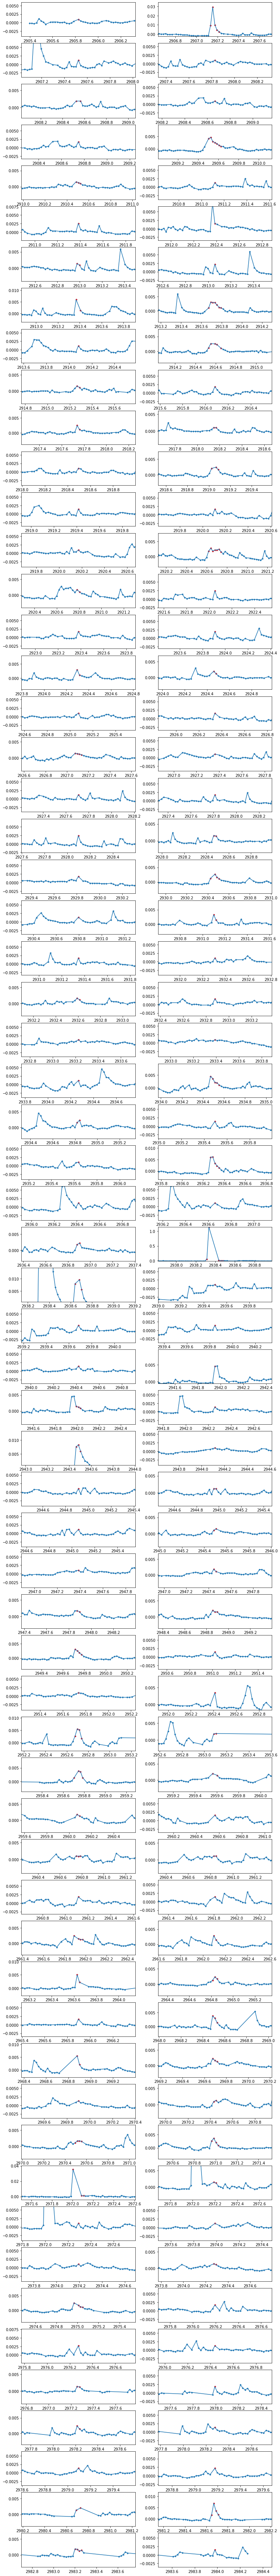

In [41]:
# from https://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-in-a-numpy-array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

flares = consecutive(cand1)
npeaks = len(flares)
buffer_size = 0
print(npeaks, flares)

fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
for i in range(npeaks): # range(npeaks)
    ax = axes[i]
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) # add n points to the left for plot
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) # add n points to the right for plot
    #print(buffer)
    #print(flcd.time.value[buffer][0]-0.5)
    ax.plot(flcd.time.value, flux_diff)
    ax.scatter(flcd.time.value, flux_diff, s=10)
    ax.scatter(flcd.time.value[buffer], 
                               flux_diff[buffer], color='red', s=10)
    #ax.axvline(time[flares[i]][np.argmax(lc.PDCSAP_FLUX[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[buffer][0]-0.5, flcd.time.value[buffer][-1]+0.5)
    ax.set_ylim(np.min(flux_diff[buffer])-0.005, np.max(flux_diff[buffer])+0.005)
    ax.ticklabel_format(useOffset=False) # keeps all axes in non-scientific notation

plt.show()

Altaipony detrend + Davenport FINDflare() function to find flares is a good start (mostly TPs, 54 flares), but some FPs are pretty obvious (multiple parts of a flat hill are counted), while right next to them are, well, maybe not necessarily obvious flares, but rather flare candidates that look similar to ones that have been counted as such.

With that in mind, let's try Altaipony detrend + savgol further detrend + FINDflare()

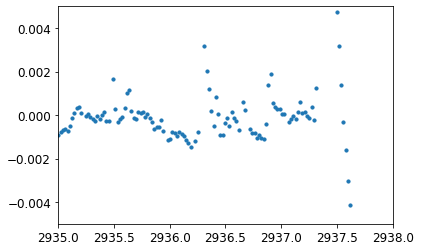

In [28]:
smooth = savgol_filter(flux_diff, 91, polyorder=3)
resid = flux_diff - smooth
#mask = resid < 3.5*np.sqrt(np.mean(resid**2))
plt.scatter(flcd.time.value, resid, s=10)
plt.xlim(2935, 2938)
plt.ylim(-0.005, 0.005)
plt.show()


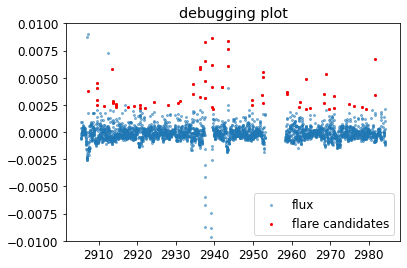

In [29]:
gapwindow = 0.1
minsep = 3
import appaloosa_snippets.appaloosa as appaloosa

# run final flare-find on DATA - MODEL
isflare = appaloosa.FINDflare(resid, error, N1=7, N2=4, N3=1, # setting N3=1 is risky for FPs, but there's at least one flare we're missing without it
                    returnbinary=True, avg_std=True, std_window=7)

# now pick out final flare candidate points from above
cand1 = np.where(isflare > 0)[0]

time = flcd.time.value #lc.TIME
#time = np.array(time)
x1 = np.where((np.abs(time[cand1]-time[-1]) < gapwindow))
x2 = np.where((np.abs(time[cand1]-time[0]) < gapwindow))
cand1 = np.delete(cand1, x1)
cand1 = np.delete(cand1, x2)
if (len(cand1) < 1):
    istart_i = np.array([])
    istop_i = np.array([])
else:
    # find start and stop index, combine neighboring candidates in to same events
    istart_i = cand1[np.append([0], np.where((cand1[1:]-cand1[:-1] > minsep))[0]+1)]
    istop_i = cand1[np.append(np.where((cand1[1:]-cand1[:-1] > minsep))[0], [len(cand1)-1])]
# if start & stop times are the same, add 1 more datum on the end
to1 = np.where((istart_i-istop_i == 0))
if len(to1[0])>0:
    istop_i[to1] += 1

#print(flux_model_i)
plt.figure()
plt.title('debugging plot')
#plt.scatter(time, norm_flux, alpha=0.5,label='flux', s=15)
plt.scatter(flcd.time.value, resid, alpha=0.5,label='flux', s=4)
#plt.plot(time,flux_model_i+np.nanmedian(lc.PDCSAP_FLUX), c='black',label='flux model')
#plt.scatter(time[cand1], np.array(norm_flux)[cand1], c='red',label='flare candidates', s=15)
plt.scatter(flcd.time.value[cand1], np.array(resid)[cand1], c='red',label='flare candidates', s=4)
#plt.xlim(2935, 2938) # 2970, 2975
plt.ylim(-0.01, 0.01)
plt.legend()
plt.show()

43 [array([79]), array([81]), array([184, 185, 186, 187]), array([270]), array([364]), array([378, 379, 380]), array([420, 421, 422]), array([568]), array([631]), array([705]), array([709]), array([771]), array([873]), array([1047]), array([1155]), array([1183]), array([1335, 1336]), array([1417, 1418, 1419]), array([1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474]), array([1510, 1511]), array([1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556]), array([1563]), array([1665, 1666]), array([1733, 1734, 1735]), array([2023, 2024]), array([2147]), array([2160, 2161, 2162]), array([2195, 2196]), array([2327]), array([2336]), array([2406, 2407]), array([2453]), array([2617, 2618]), array([2629]), array([2666]), array([2724, 2725]), array([2772]), array([2899]), array([2954]), array([3026]), array([3069]), array([3167, 3168]), array([3245])]


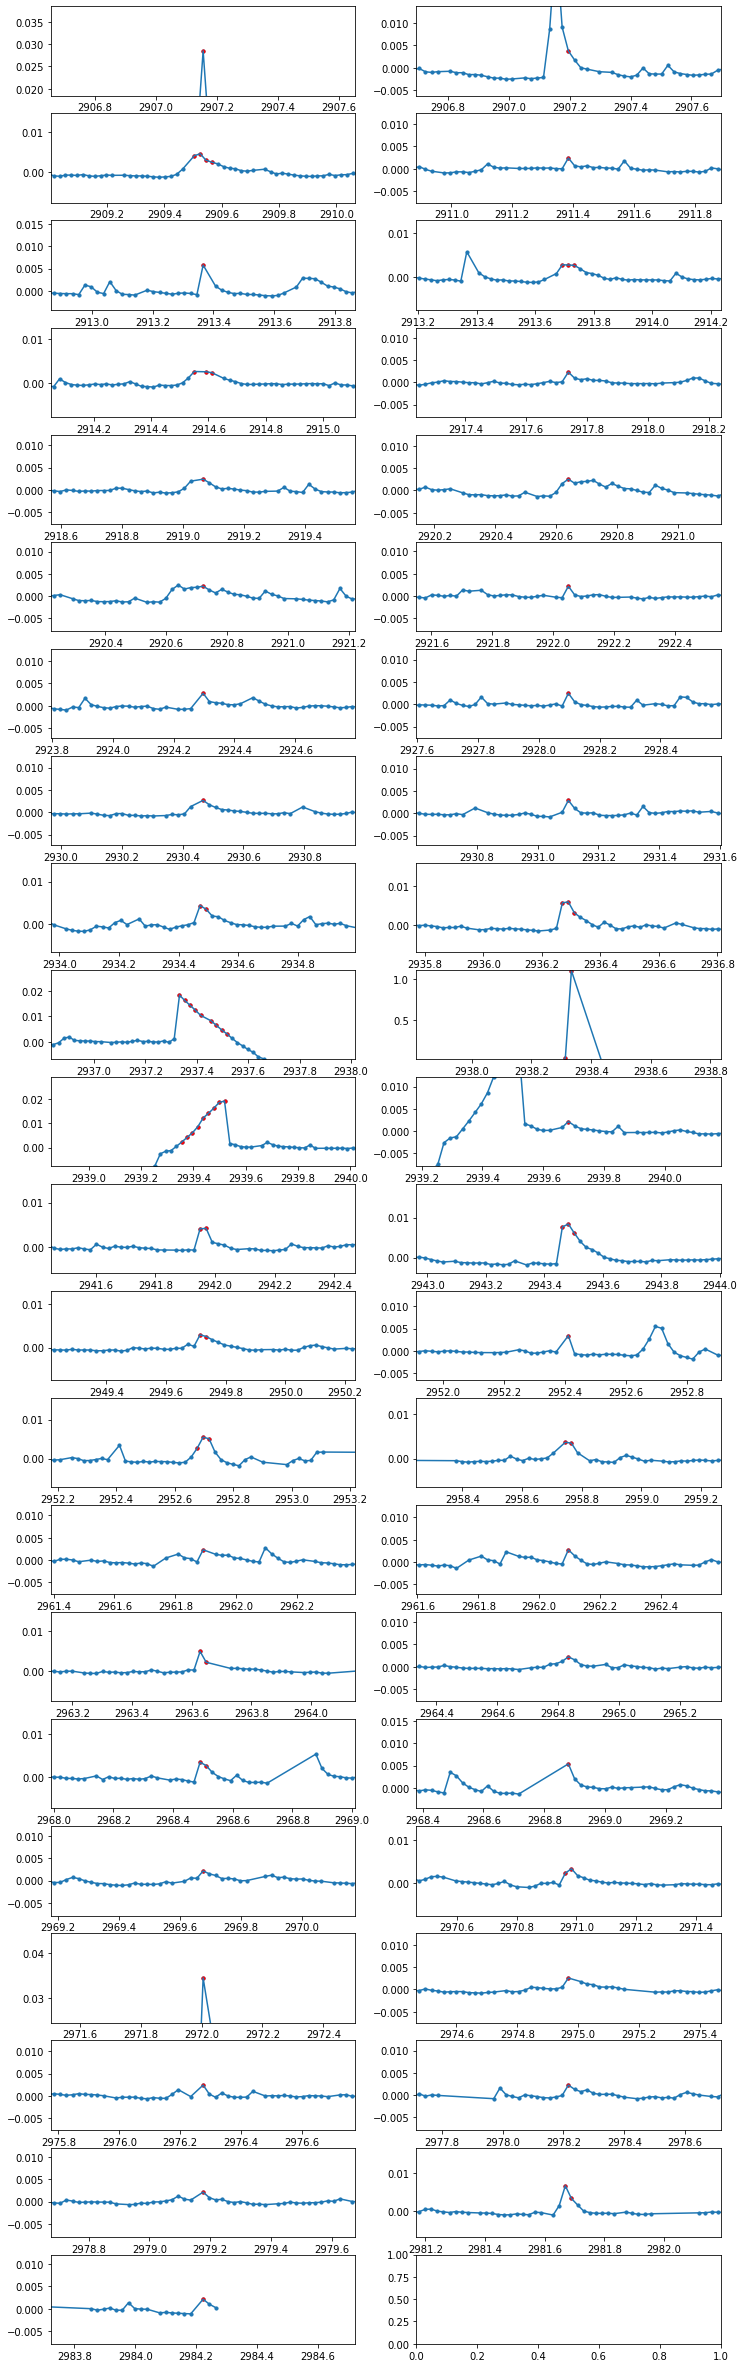

In [59]:
# from https://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-in-a-numpy-array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

flares = consecutive(cand1)
npeaks = len(flares)
buffer_size = 0
print(npeaks, flares)

fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
axes = axes.flatten()
for i in range(npeaks): # range(npeaks)
    ax = axes[i]
    buffer = np.insert(flares[i], 0, np.arange(flares[i][0]-buffer_size, flares[i][0])) # add n points to the left for plot
    buffer = np.append(buffer, np.arange(flares[i][-1], flares[i][-1]+buffer_size)) # add n points to the right for plot
    #print(buffer)
    #print(flcd.time.value[buffer][0]-0.5)
    ax.plot(flcd.time.value, resid)
    ax.scatter(flcd.time.value, resid, s=10)
    ax.scatter(flcd.time.value[buffer], 
                               resid[buffer], color='red', s=10)
    #ax.axvline(time[flares[i]][np.argmax(lc.PDCSAP_FLUX[flares[i]])], -1, 1, color='r', linestyle=':')
    ax.set_xlim(flcd.time.value[buffer][0]-0.5, flcd.time.value[buffer][-1]+0.5)
    ax.set_ylim(np.min(resid[buffer])-0.01, np.max(resid[buffer])+0.01)
    ax.ticklabel_format(useOffset=False) # keeps all axes in non-scientific notation

plt.show()